# Branching ratios - Yago Obispo Gerster | mn304 | yago.obispo_gerster@stud.uni-heidelberg.de

A newly discovered particle was found to be able to decay in two different ways (two different decay channels): A and B. The probability $f_A$ for decay A to happen is called its _branching ratio_.

## Tasks


a) For a fixed number N of observed decays, explain why the number of decays to channel A should follow a binomial distribution.

b) Write down the conditional p.d.f. (aka posterior probability distribution) obtained via Bayes' theorem $P(f_A|\vec{k})$ where $\vec{k}$ are your observations. Explain the parameters and the different terms. What do you want to describe with $P(f_A|\vec{k})$?

c) Assuming a flat prior for the branching ratio $\pi(f_A)=1 \forall f_A\in[0,1]$ calculate and draw the posterior probability distribution for $f_A$ after measuring a single decay, which went to A.

d) Using the previous result as a prior, calculate and draw the new posterior after each of the observed additional decays "A", "B", "B", "A"

e) Calculate and draw the posterior after observing 100 decays, with 63 going to A.


### Hints

1. It is recommended to not start coding right away.
1. Realize what **one experiment** means in this task and how you then construct your Likelihood.

You can solve this problem by explicitly going through the single steps of the calculations. When representing the distributions with numpy arrays, 'np.sum()' comes in handy in the calculation of the normalization. Alternatively, you can also use the beta pdf which was discussed in the lecture and which is accessible through the scipy.stats package 'from scipy.stats import beta‘.

# Solution

## Excercise a: When to assume binomial distribution

If we observe $N$ decays, at each decay there are $\textbf{only 2 possible outcomes}$, being a decay in channel A and a decay in channel B. Furthermore, the probability of each decay is independent of the other decays and therefore the $\textbf{probability remains constant}$.
Those are the 2 requisites needed in order for a process to assume a binomial distribution, as if the probability does not change, the probability of measuring one decay chain with $N_A$ times $A$ and $N-N_A$ times $B$ does not depend on the order in which the decays took place, and is therefore
$$(f_A)^{N_A} \cdot (1-f_A)^{1-N_A}$$
In total there are $N\cdot (N-1)\cdot ...\cdot (N-N_A+1)$ possible decay chains, where $N_A$ $A$ decays are selected of the total number of decays $N$. As we are not interested in the order we divide by $N_A!$ and therefore obtain the binomial coefficient $\binom{N}{N_A}$. Our probability distribution therefore is a binomial distribution, where the probability of observing exactly $N_A$ decays of type $A$ is given by:
$$ P(N,N_A,f_A) = \binom{N}{N_A}(f_A)^{N_A} \cdot (1-f_A)^{1-N_A}$$

## Excercise b: Posterior probability distribution


According to Bayes theorem, the following equation holds:
$$P(f_A|\vec{k}) = \frac{L(\vec{k}|f_A)\cdot \pi(f_A)}{\int L(\vec k|f_A)\cdot \pi(f_A) df_A}$$

The posterior probability distribution $P(f_A|\vec k)$ depends on the model parameter $f_A$, which here is the branching ratio and the measured decay sequence $\vec k$. It tells us of which magnitude the probability of $f_A$ is for taking a certain value, given the measurements of several decays $\vec k$.

The likelihood function is given by
$$ L(\vec k|f_A) = \prod\limits_{i=1}^{N} f(k_i,f_A) = (f_A)^{N_A}\cdot (1-f_A)^{N-N_A}$$
where $f(k_i,f_A)$ is our probability density function, which in our case is $f_A$ for the case $k_i=A$ and $1-f_A$ for the case $k_i=B$ (so this explains the step from the second to third equality). The likelihood function therefore describes the probabilty to measure certain decay sequences $\vec k$ for a given $f_A$.

The term $\pi(f_A)$ is the prior probability distribution, which is the core of the Bayesian statistics interpretation, as it stands for the knowledge about the parameters which will be estimated prior to the experiment. This is really interesting, as we can then interpret the posterior probability distribution $P(f_A|\vec k)$ as how the probability is updated after the outcome $\vec k$.

The integral in the denominator does not depend on $f_A$ and can therefore be seen as a normalization factor.

## Excercise c: Posterior probability distribution after measuring a single decay A

In the next step, we will consider a constant prior probability distribution:
$$\pi(f_A)=1 \forall f_A\in[0,1]$$

In a single measurement of a decay of the particle, we observed it was through channel A.
With this information, we can now proceed to compute the posterior probability distribution of obtaining a model parameter $f_A$ and plot this distribution.

The posterior probability in this special case has the form:
$$P(f_A|\vec k=A) = \frac{f(A,f_A)\cdot 1}{\int\limits_{0}^{1} f_A df_A} = \frac{f_A}{\frac{1}{2}} = 2f_A$$

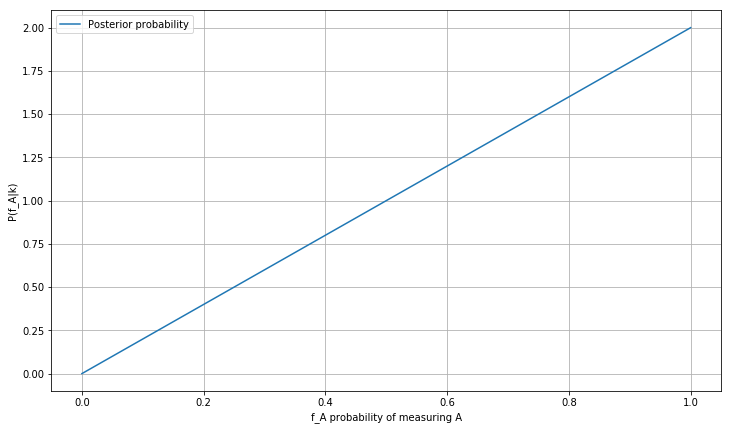

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Plot the posterior probability distribution
f_A = np.linspace(0,1,100000)
pos_prop = 2*f_A

plt.figure(figsize=(12,7))
plt.grid()
plt.plot(f_A,pos_prop,label="Posterior probability")
plt.xlabel("f_A probability of measuring A")
plt.ylabel("P(f_A|k)")

plt.legend()

## Excercise d: Update posterior probability

Considering the previous result as prior, we now want to compute and draw the new posterior after each of the observed additional decays: "A","B","B","A".

Therefore we will iteratively determine the posteriors after each measurement. For the integral in the denominator of the posterior, we will use the hint and use np.sum() for the normalization.

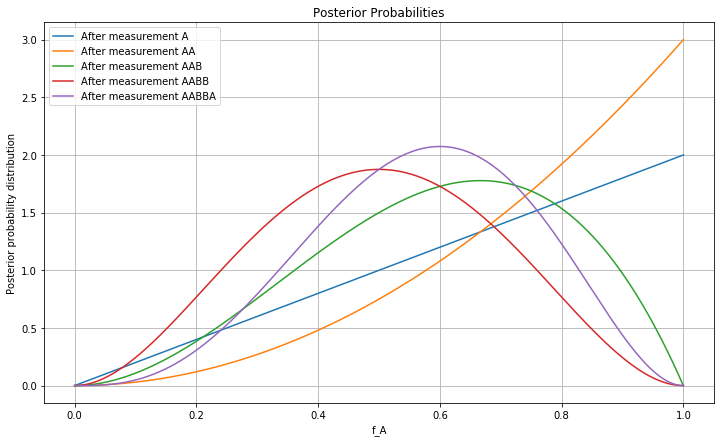

In [2]:
#Array which contains all the values for the posterior prob. distr. after 0,1,2,3,4 extra measurements
pos_up = np.zeros((5,len(pos_prop)))

#Posterior after 0 extra measurements is the posterior of excercise d
pos_up[0] = pos_prop

#Array which contains measurements
measure = np.array(["A","B","B","A"])

#Iterate and updates the posterior
for i in range(1,5):
    #Set Likelihood
    L = 0
    if measure[i-1] == "A":
        L = f_A
    else:
        L = 1-f_A
        
    #Set prior to the posterior before
    prior = pos_up[i-1]
    
    #Compute denominator
    denom = np.sum(L*prior)/len(L*prior)
    
    #Update posterior
    pos_up[i] = L*prior / denom

#Plot the posteriors
plt.figure(figsize = (12,7))
plt.title("Posterior Probabilities")
plt.grid()
plt.plot(f_A,pos_up[0],label="After measurement A")
plt.plot(f_A,pos_up[1],label="After measurement AA")
plt.plot(f_A,pos_up[2],label="After measurement AAB")
plt.plot(f_A,pos_up[3],label="After measurement AABB")
plt.plot(f_A,pos_up[4],label="After measurement AABBA")
plt.xlabel("f_A")
plt.ylabel("Posterior probability distribution")

plt.legend()

This graphical representation shows in an intuitive manner, how the bayesian approach works. We start with a uniform distribution of the prior, which means, that we do not have any information about the system we want to analyze and therefore set the prior for our probability to measure A $f_A$ at the same value, so no value of $f_A$ is more probable than another.

After the first measurement of A, we realize, that it must be more probable to measure A according to our current information, so the updated posterior probability distribution (in blue) has a maximum for $f_A = 1$.

After the second measurement we already have the chain AA, so at this point, we are even more certain that $f_A$ should take higher values with a higher probability. This is represented by the orange graph where the value for the highest $f_A$ is $P(f_A=1|AA)=3$ and for low $f_A$ values the posterior takes smaller values (the orange graph is convex for small values).

After the third measurement however, we have the chain AAB, so we know that $f_A=1$ is not an option anymore and need to adjust our posterior respectively (green line).

After each additional measurements the posterior is again adjusted, so we expect it to become more accurate with increasing sample size. For infinitely many measurements we expect the posterior to represent the real distribution.

## Excercise e: Posterior after 100 decays

In the last step, I am going to compute the posterior after 100 decays, considering that 63 of them were measured at the channel A.

We start again with a uniform prior
$$\pi(f_A)=1 \forall f_A\in[0,1]$$

The likelihood function needs to be adapted, by summing all the products of the probability density functions where $\vec k$ takes exactly $63$ times the value A and $37$ times the value B. As all the products over which we are making the sum result in the same value (probabilities are independent in our case so after each measurement they stay the same), we can replace the sum with a factor which tells us, how many possibilities there are to choose decay chains with $63$ times A. This factor is, as previously discussed: $\binom{N}{N_A} = \binom{100}{63}$. We get:
$$ L(\vec k,f_A) = \binom{100}{63} \cdot \prod \limits_{i=1}^{N} f(k_i,f_A)
= \binom{100}{63} \cdot f_A^{63} \cdot (1-f_A)^{37} $$

Plugging this in to our formula for the posterior, we get:
$$P(f_A,\vec k(63 A's)) = \frac{f_A^{63} \cdot (1-f_A)^{37}}{\int\limits_{0}^{1} f_A^{63} \cdot (1-f_A)^{37} df_A}$$

Text(0, 0.5, 'Posterior probability distribution')

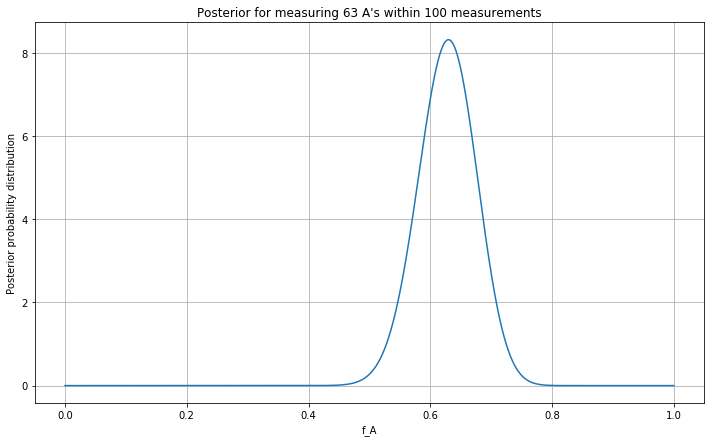

In [3]:
#Plot of the posterior for measuring 63 times A within 100 measurements
def pos_after63(f):
    return f**63 * (1-f)**37 / (np.sum(f_A**63 *(1-f)**37)/len(f))

plt.figure(figsize=(12,7))
plt.title("Posterior for measuring 63 A's within 100 measurements")
plt.grid()
plt.plot(f_A,pos_after63(f_A))
plt.xlabel("f_A")
plt.ylabel("Posterior probability distribution")

The maximum is located at $f_A=0.63$, which agrees with the probability of obtaining $63$ times A in a sample of $100$ measurements.

However, as our experiment was limited to $100$ measurements, we can still see some deviation around the expected probability of $63%$. If we had been in a scenario where we measured $100000$ times and had got the result of $63000$ A's, the maximum would still be located at the same position, but the peak would be much higher.